<h2><b>Projet PFA:Automatisation des Tickets</h2><b></b>
<ul><li>Réalisé par : ASSAG Khadija</li>
    </ul>

- <b>Import Librairies</b>

In [18]:

import os
import pandas as pd
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')
import re
import preprocessor as p
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud
import string

- <b>Read DataSet </b>

In [11]:
df = pd.read_csv(os.getcwd()+'/customer_support_tickets.csv')
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [17]:

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cx3u\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- <b>Cleaning_Function</b>

In [29]:
def preprocess_text(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Supprimer les stopwords
    #text = ' '.join([word for word in text.split() if word not in stop_words])
    # Appliquer le stemming
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [30]:
# cleaning "Ticket Description"
df['clean text'] = df['Ticket Description']
df['clean text'] = df['clean text'].apply(preprocess_text)
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,clean text
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN,im have an issu with the productpurchas pleas ...
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN,im have an issu with the productpurchas pleas ...
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,im face a problem with my productpurchas the p...
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,im have an issu with the productpurchas pleas ...
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,im have an issu with the productpurchas pleas ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN,my productpurchas is make strang nois and not ...
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN,im have an issu with the productpurchas pleas ...
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,im have an issu with the productpurchas pleas ...
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,im have an issu with the productpurchas pleas ...


In [31]:
corpus = list(df['clean text'])
corpus = corpus[0:100]

In [32]:
corpus_embeddings = embedder.encode(corpus)

In [33]:
corpus_embeddings

array([[-0.5598159 ,  0.4293022 ,  0.12692636, ...,  0.36499953,
         0.10137985, -0.20131478],
       [-1.1994889 , -0.1695908 ,  0.5837657 , ...,  0.12196449,
         0.12406255, -0.07251855],
       [-0.34298685, -0.52597976,  0.16590662, ..., -0.06393169,
         0.22923528, -0.14095247],
       ...,
       [-0.36856335, -0.08702859, -0.07147124, ..., -0.48963377,
         0.24542841, -0.03860483],
       [ 0.16849169, -0.23017143,  0.59604174, ..., -0.39696723,
         0.04863855, -0.3460553 ],
       [-0.8590593 ,  0.726356  ,  0.34366623, ...,  0.40344298,
         0.17747034,  0.9899662 ]], dtype=float32)

In [34]:
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [35]:
cluster_assignment

array([4, 2, 1, 0, 0, 1, 2, 4, 4, 2, 0, 0, 4, 1, 3, 0, 4, 0, 2, 0, 0, 4,
       2, 2, 0, 2, 2, 2, 1, 0, 3, 0, 2, 4, 3, 1, 0, 1, 0, 4, 1, 1, 2, 4,
       3, 4, 0, 0, 0, 4, 2, 1, 4, 2, 2, 0, 4, 4, 1, 0, 2, 4, 2, 3, 1, 2,
       2, 1, 2, 2, 1, 1, 1, 2, 3, 0, 1, 3, 0, 0, 4, 2, 3, 4, 1, 1, 4, 1,
       0, 0, 1, 2, 3, 4, 4, 1, 1, 1, 3, 4])

In [36]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df.head()

,corpus,cluster
0,im have an issu with the productpurchas pleas ...,4
1,im have an issu with the productpurchas pleas ...,2
2,im face a problem with my productpurchas the p...,1
3,im have an issu with the productpurchas pleas ...,0
4,im have an issu with the productpurchas pleas ...,0


In [37]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['im have an issu with the productpurchas pleas assist if you have a problem your interest in and id love to see this happen pleas check out the feedback ive alreadi contact custom support multipl time but the issu remain unresolv', 'im have an issu with the productpurchas pleas assist note the seller is not respons for ani damag aris out of the deliveri of the battleground game pleas have the game in good condit and ship to you ive notic a sudden decreas in batteri life on my productpurchas it use to last much longer', 'im have an issu with the productpurchas pleas assist 18007990808 product search what new in 2345 report feedback custom servic is your best im use the origin charger that came with my productpurchas but it not charg proper', 'im have an issu with the productpurchas pleas assist 4 it is possibl that we cannot find some type of text or a product name to identifi someon like mr brown 5 on the ive review the troubleshoot step on the offici support websit but the

In [38]:
#word cloud
def word_cloud(pred_df,label):
    wc = ' '.join([text for text in pred_df['corpus'][pred_df['cluster'] == label]])
    wordcloud = WordCloud(width=800, height=500,
    random_state=21, max_font_size=110).generate(wc)
    fig7 = plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')


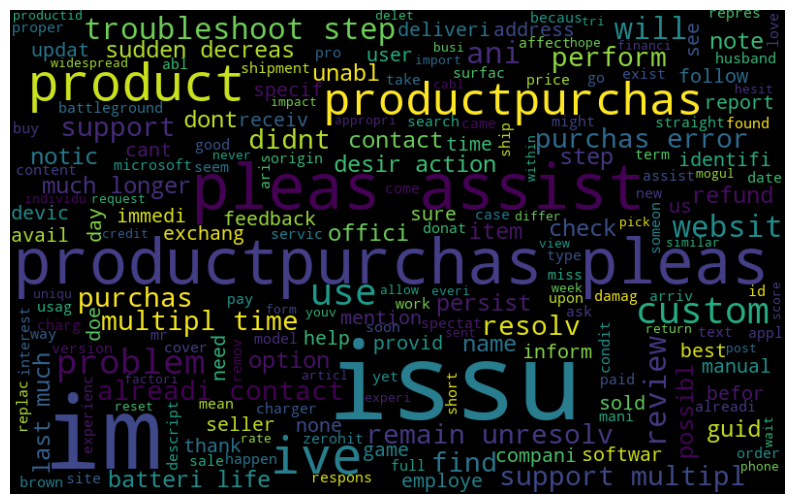

In [39]:
word_cloud(cluster_df,0)

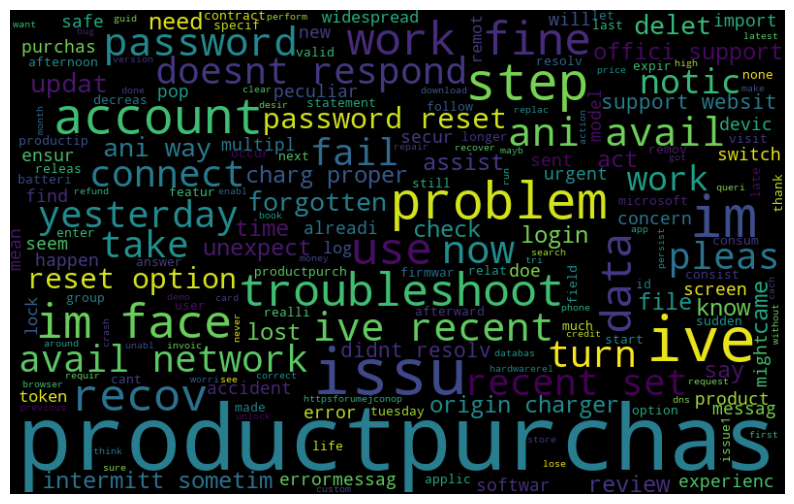

In [40]:
word_cloud(cluster_df,1)

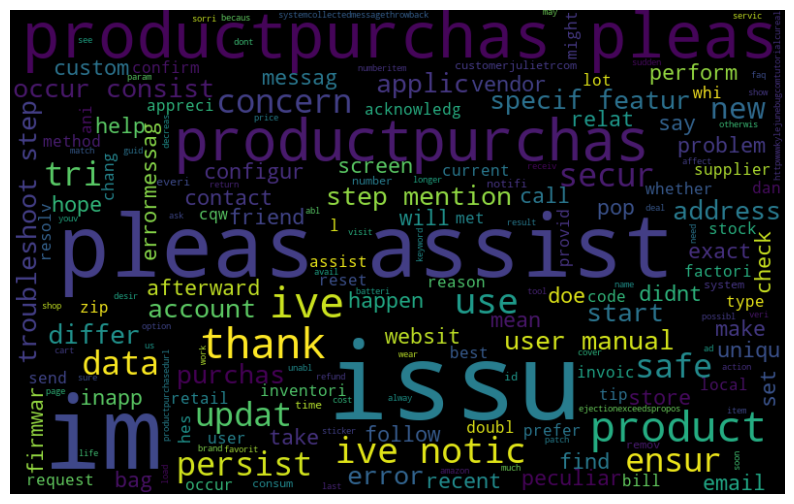

In [41]:
word_cloud(cluster_df,4)